# Árvore de decisão
***


Árvores de decisão são modelos estatísticos que utilizam um treinamento
supervisionado para a classificação e previsão de dados. Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. 

Estes modelos utilizam a estratégia de dividir para conquistar: um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema. As árvores de decisão estão entre os mais populares algoritmos de inferência e tem sido aplicado em várias áreas como, por exemplo, diagnóstico médico e risco de crédito, e deles pode-se extrair regras do tipo “se-então” que são facilmente compreendidas.


Exemplo gráfico de uma árvore de decisão:


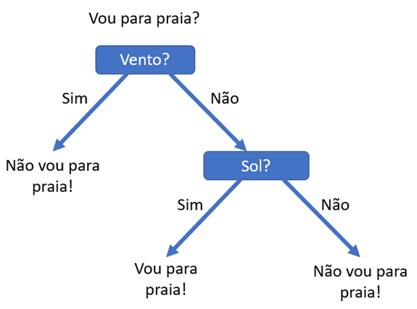


Para essa atividade, vamos implementar o algoritmo de árvore de decisão para um dataset de informações de diabetes. Para isso vamos executar os seguintes passos:


- Carregar o dataset de diabetes
- Análisar os dados coletados
- Veriicar a necessidade de tratamento de dados
- Balancear os dados 
- Separar conjunto de dados para treino e teste
- Aplicar modelo ML de árvore de decisão
- Visualizar resultado

### Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Base de dados 

Vamos utilizar a base que contém informações de pessoas que possuem ou não diabetes. Para isso, analisar vários atributos para predizer se a pessoa possui ou não diabetes.

A base utilizada pode ser obtida no link abaixo.

https://www.kaggle.com/saurabh00007/diabetescsv?select=diabetes.csv




### Realizando o carregamento dos dados

In [2]:
PATH = r'C:\Users\leandro.figueira\Google Drive\IGTI\Aulas interativas\ABD\Fundamentos de BIg Data\arvore de decisao\dataset'
dados_diabetes = pd.read_csv(PATH + '/diabetes.csv', sep = ';')

### Verificando dados do dataset

In [3]:
dados_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gravidez                768 non-null    int64  
 1   glicose                 768 non-null    int64  
 2   pressao_sangue          768 non-null    int64  
 3   espessura_pele          768 non-null    int64  
 4   insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   predisposicao_diabetes  768 non-null    float64
 7   idade                   768 non-null    int64  
 8   diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Tratando e analisando os dados 

In [4]:
dados_diabetes.head()

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dados_diabetes.describe()

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# verificando valores nulos
dados_diabetes.isna().sum()

gravidez                  0
glicose                   0
pressao_sangue            0
espessura_pele            0
insulina                  0
IMC                       0
predisposicao_diabetes    0
idade                     0
diabetes                  0
dtype: int64

### Contar número de registros de cada classe

In [7]:
dados_diabetes.groupby(['diabetes'])['diabetes'].count()

diabetes
0    500
1    268
Name: diabetes, dtype: int64

Verificamos que o nosso dataset se encontra desbanceado.Precisamos coletar dados de forma balanceada afim de não prejudicar a classificação.

### Instalando biblioteca imblearn

Imblearn é uma bilbioteca utilizanda para tratar dados desbalanceados. A biblioeca oferece várias técnicas de reamostragem comumente usadas em conjuntos de dados que mostram um forte desequilíbrio entre as classes. 

In [ ]:
!pip install imblearn

In [8]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

### Separando conjunto de dados de features e target

Nesta etapa, vamos separar os conjuntos em duas bases de dados. 
- X_dados contém todas as features (gravidez, glicose,pressao_sangue, etc) de cada amostra. 
- y_dados contém apenas o target (possui diabetes/não possui diabetes)

In [9]:
X_dados = dados_diabetes.drop('diabetes', axis=1).values # todos atributos menos a variavel label 
y_dados = dados_diabetes['diabetes'].values # os labels diabetes ou não 

### Criando função para balancear os dados
UnderSampler é um método consiste em reduzir o número de observações da classe majoritária para diminuir a diferença entre as categorias.

In [10]:
def balanceamento_dados(X_dados, y_dados):
    undersample = RandomUnderSampler(random_state = 42)
    X_under, y_under = undersample.fit_resample(X_dados, y_dados)
    
    tl = TomekLinks(sampling_strategy='all') #trabalha com outliers
    X_under, y_under  = tl.fit_resample(X_under, y_under)
    return X_under, y_under

### Aplicando técnica de balanceamento na base de dados

In [11]:
X_dados_balanceados, y_dados_balanceados = balanceamento_dados(X_dados, y_dados)

### Verificando balanceamento realizado

In [12]:
print(len(X_dados_balanceados), len(y_dados_balanceados))

456 456


In [13]:
# outra forma de verificar o balanceamento
import collections
print(collections.Counter(y_dados_balanceados))

Counter({0: 228, 1: 228})


Percebemos que o balanceamento foi realizado com sucesso. 
Temos:
- 228 registros para o target 0 
- 228 registros para o target 1

In [14]:
#verificar lista com dados balaceados
y_dados_balanceados

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
# Visualizando dados balanceados através de um dataframe
df_dados_balanceados = pd.DataFrame(y_dados_balanceados,columns=['diabetes'])
df_dados_balanceados.groupby('diabetes')['diabetes'].count()

diabetes
0    228
1    228
Name: diabetes, dtype: int64

### Criando função para realizar separação entre o conjunto de treinamento e teste

Para que o modelo de árvore de decisão tenha êxito, é necessário separamos nosso dataset em um conjunto de dados para treinar o modelo e um conjunto de dados para testa-lo.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
def separa_treino_teste(X_dados_balanceados, y_dados_balanceados):
    X_train, X_test, y_train, y_test = train_test_split(X_dados_balanceados, y_dados_balanceados, random_state=42, test_size =0.2)
    return X_train, X_test, y_train, y_test

In [18]:
#Separando conjuntos de treino e teste 
X_train, X_test, y_train, y_test = separa_treino_teste(X_dados_balanceados, y_dados_balanceados)

### Verificando dados em cada variável

In [19]:
print(f'''Vamos treinar o modelo com {len(X_train)} registros da classe X e {len(y_train)} registros da classe y
Testaremos o modelo com  {len(X_test)} registros da classe X e {len(y_test)} registros da classe y
''')

Vamos treinar o modelo com 364 registros da classe X e 364 registros da classe y
Testaremos o modelo com  92 registros da classe X e 92 registros da classe y



### Criando árvore de decisão

In [20]:
from sklearn import tree
#from sklearn.tree import export_graphviz, DecisionTreeClassifier

algoritmo_arvore = tree.DecisionTreeClassifier() # inicia a classificação da arvore de decisao
modelo = algoritmo_arvore.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

### Verificando a importância de cada feature no modelo 
É muito importânte visualizar a importância de cada feature representa no modelo. Para isso, temos a função feature_importances_ que nos auxilia ver o resultado desse dado.

In [21]:
print(modelo.feature_importances_)

[0.04362399 0.3985482  0.05342075 0.05680209 0.04757009 0.18111117
 0.05679675 0.16212696]


In [22]:
dados_diabetes.columns

Index(['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
       'IMC', 'predisposicao_diabetes', 'idade', 'diabetes'],
      dtype='object')

In [23]:
pd.DataFrame(modelo.feature_importances_, columns =['importancia'],
             index = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
       'IMC', 'predisposicao_diabetes', 'idade']).sort_values('importancia', ascending=False)

,importancia
glicose,0.398548
IMC,0.181111
idade,0.162127
espessura_pele,0.056802
predisposicao_diabetes,0.056797
pressao_sangue,0.053421
insulina,0.047570
gravidez,0.043624


Para esse primeiro experimento, a feature que possui importância para o modelo é glicose com 0,42.

### Verificando e analisando as classes do modelo

Nessa etapa, vamos analisar e criar rótulos que serão utilizados no nosso modelo visual da árvore de decisão.

In [24]:
modelo.classes_

array([0, 1], dtype=int64)

### Criando lista com os nomes das features e dos rótulos.

In [25]:
nomes_features = ['gravidez','glicose','pressao_sangue',
                  'espessura_pele','insulina','IMC',
                  'predisposicao_diabetes','idade']

nomes_classes = ['NÃO DIABETICO','DIABETICO']

### Instalando biblioteca para visualização da árvore de decisão

Graphviz é um software de visualização de gráficos de código aberto. A visualização de gráficos é uma forma de representar informações estruturais como diagramas de gráficos abstratos e redes. 

link acesso: https://graphviz.org/

In [ ]:
!pip install graphviz

## Observação  importante!!! 

Em alguns casos ao executar a visualização utilizando a biblioteca graphviz faz necessário realizar a instalação da ferramenta na máquina e atualizar o diretório no path do windows.

link: https://graphviz.org/download/

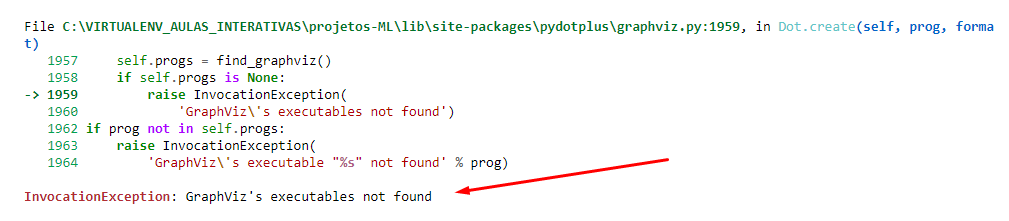

In [26]:
# Atualizar caminho Graphviz no path do windows
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

### Criando função para  visusalização da árvore gerada

In [27]:
import graphviz
def visualiza_arvore(modelo):   
    arvore = tree.export_graphviz(modelo, 
                    feature_names=nomes_features,
                    class_names=nomes_classes,
                    rounded=True,
                    special_characters=True, filled=True)
    graph = graphviz.Source(arvore)  
    return graph

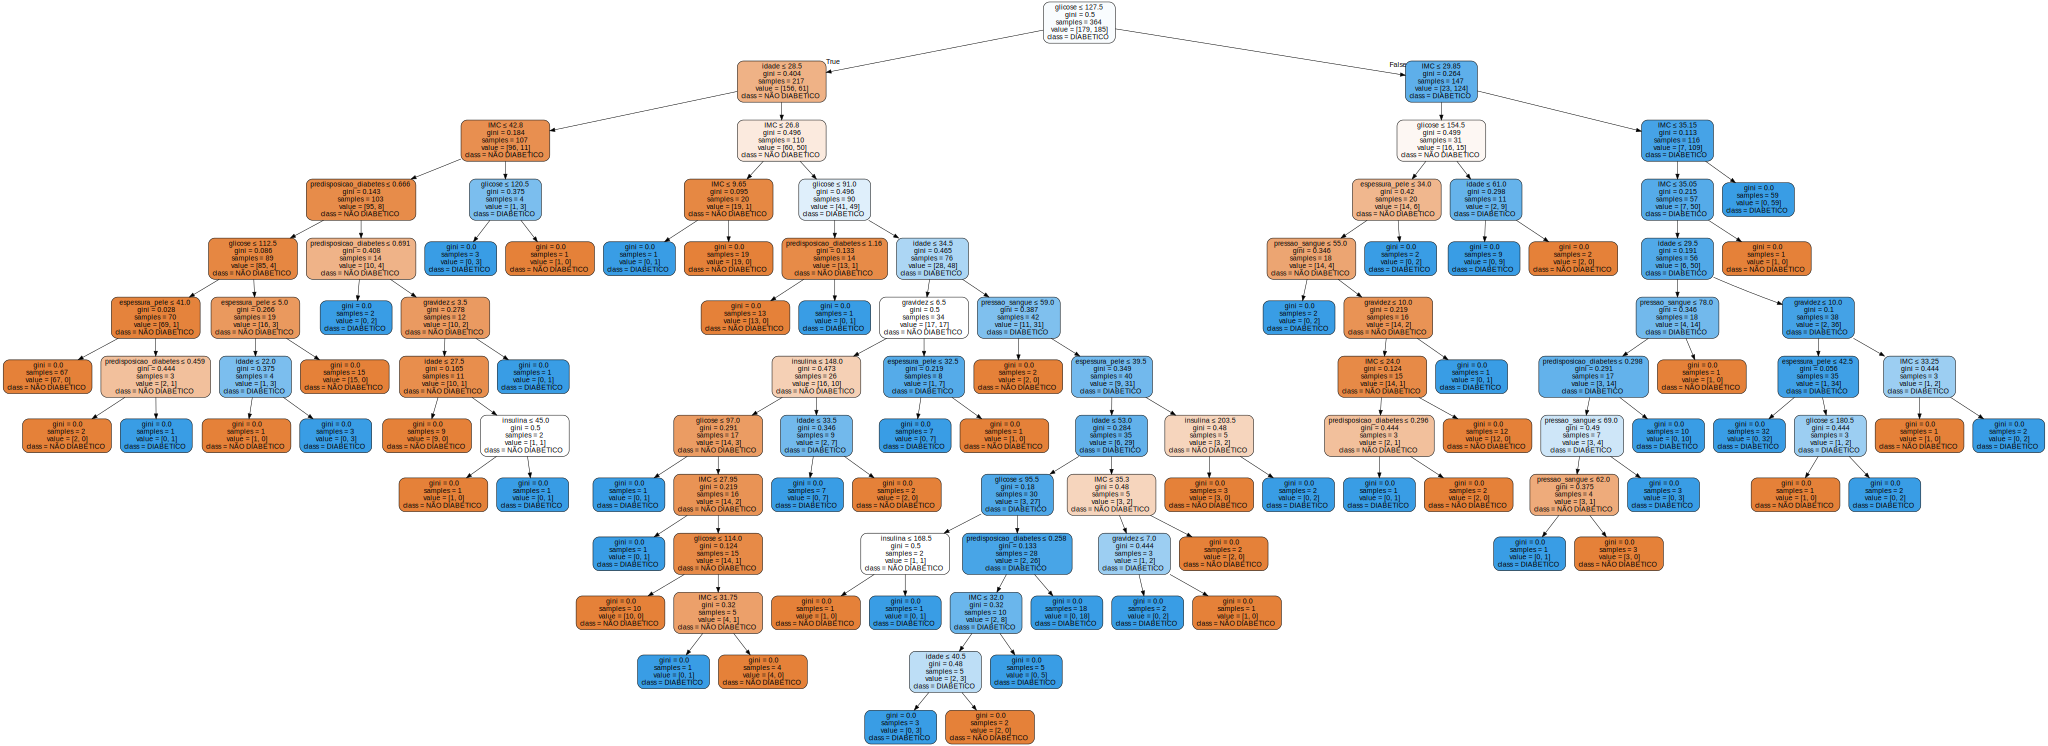

In [28]:
#Visualiza a arvóre completa
visualiza_arvore(modelo)

Podemos observar nessa visualização:
- Identificar as *features* que possuem maior relevância
- Valor índice gini
- O número de amostras classificadas em cada nó, 
- A classificação do target

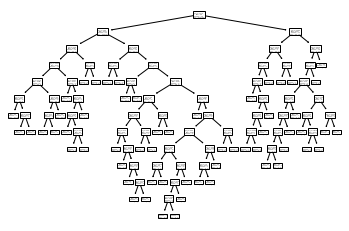

In [29]:
#Visualiza estrutura da árvore 
tree.plot_tree(modelo)
plt.show()

### Calculando acurácia do modelo

A acurácia é uma das metricas que podemos utilizar para avaliar um modelo de machine learning. A acurácia é a proximidade de um resultado com o seu valor de referência real. Dessa forma, quanto maior o nível de acuracidade, mais próximo da referência ou valor real é o resultado encontrado.

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.7282608695652174

Observamos que para esse experimento, obtivemos uma acuráia de 72,82%. Ou seja, da forma que foi modelado, obtivemos 72,82% de acerto em comparação a base real. 

### Criando função que gera features de importância para o modelo

Vamos criar funções para retornar os resultados de várias árvores de decisão para análises futuras.

In [32]:
def gera_features_importantes(modelo):
    df = pd.DataFrame(modelo.feature_importances_, columns =['importancia'],
             index = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
       'IMC', 'predisposicao_diabetes', 'idade']).sort_values('importancia', ascending=False)
    return df

In [33]:
print(gera_features_importantes(modelo))

                        importancia
glicose                    0.398548
IMC                        0.181111
idade                      0.162127
espessura_pele             0.056802
predisposicao_diabetes     0.056797
pressao_sangue             0.053421
insulina                   0.047570
gravidez                   0.043624


### Criando função que gera árvore de decisão

In [34]:
#Cria diretório para salvar imagens das árvores geradas
PATH_IMG = r'C:\Users\leandro.figueira\Google Drive\IGTI\Aulas interativas\ABD\Fundamentos de BIg Data\arvore de decisao\arvores_geradas'

In [35]:
def cria_modelo(X_train, y_train, y_test, tamanho_arvore):
    
    algoritmo_arvore = tree.DecisionTreeClassifier(max_depth=tamanho_arvore, random_state=42) # inicia a classificação da arvore de decisao
    modelo = algoritmo_arvore.fit(X_train, y_train)
    y_predido = modelo.predict(X_test)
    arvore = visualiza_arvore(modelo)
    
    #Salva arquivo pdf 
    arvore.render(f'{PATH_IMG}/modelo_tamanho_n{tamanho_arvore}')
    
    print(f'''Features com maior importância para o modelo:
            {gera_features_importantes(modelo)}
          ''')
    
    print('o valor da acuracia é : ', accuracy_score(y_test, y_predido))
            
    return arvore

### Gerando resultados com poda de árvore

Features com maior importância para o modelo:
                                    importancia
glicose                    0.701561
idade                      0.169830
IMC                        0.128609
gravidez                   0.000000
pressao_sangue             0.000000
espessura_pele             0.000000
insulina                   0.000000
predisposicao_diabetes     0.000000
          
o valor da acuracia é :  0.8043478260869565


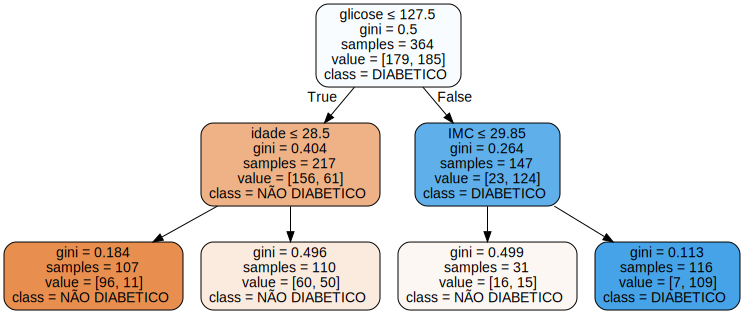

In [36]:
tamanho_arvore = 2
arvore = cria_modelo(X_train, y_train, y_test, tamanho_arvore)
arvore

Observem que ao delimitar o tamanho da árvore, chegamos a um valor de acurácia de 80,43%